# The Sparks Foundation GRIP
## Data Science and Business Analytics Internship
TASK-5  #gripapril22


# Exploratory Data Analysis on 'Indian Premier League'
* Perform Exploratory Data Analysis' on Indian Premier League'
* As a sports analysis,find out the most successfull teams,players and factors contributing win or loss of a team
* suggest teams or players a company should endorse for its products
* Dataset: [Indian-Premier-League](https://bit.ly/34SRn3b)

# Auther:Poonam Bhosale

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
matches_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches_df.shape

(756, 18)

In [7]:
matches_df["umpire3"].isnull().sum()

637

In [8]:
matches_df["umpire3"].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

matches_df.describe()

In [9]:
matches_df['id'].max()

11415

In [10]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [48]:
matches_df[matches_df.duplicated()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [50]:
score_df[score_df.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
166610,11144,2,Sunrisers Hyderabad,Rajasthan Royals,6,6,J Bairstow,DA Warner,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
167990,11150,1,Royal Challengers Bangalore,Rajasthan Royals,10,1,PA Patel,S Hetmyer,K Gowtham,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
168080,11150,2,Rajasthan Royals,Royal Challengers Bangalore,4,4,JC Buttler,AM Rahane,N Saini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
169404,11311,1,Royal Challengers Bangalore,Delhi Capitals,1,6,PA Patel,V Kohli,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170110,11314,1,Kolkata Knight Riders,Chennai Super Kings,3,1,N Rana,RV Uthappa,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Maximum Runs

In [11]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [12]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

# Maximum Wickets

In [13]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# Minimum Runs

In [14]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# Minimum Wickets

In [15]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [16]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

# OBSERVATIONS:-

1.Mumbai Indians is team which won by max and min runs and wickets of team.

2.Kolkata Knight Riders is team which won by max and min runs and wickets of team.

# SEASON WHICH HAD MORE NUMBER OF MATCHES

<function matplotlib.pyplot.show(close=None, block=None)>

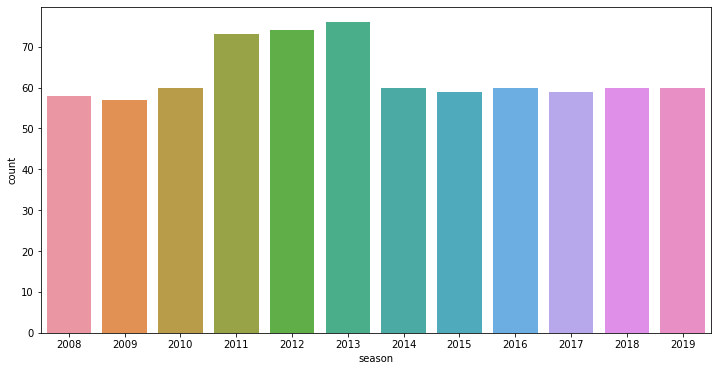

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show

In 2013,we have more number of matches

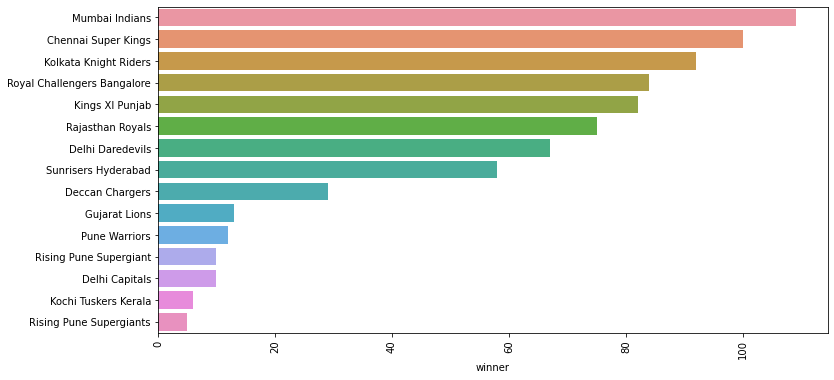

In [18]:
plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.xticks(rotation='vertical')
plt.show()

Mumbai Indians are winners of most matches

# Top Player Of The Matches Winner

In [19]:
top_players = matches_df.player_of_match.value_counts()[:10]

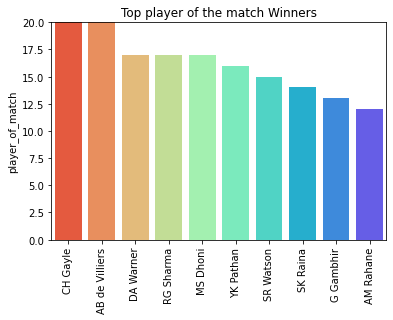

In [20]:
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="rainbow_r");
plt.show()

CH Gayle is most sucessful in all matches winner

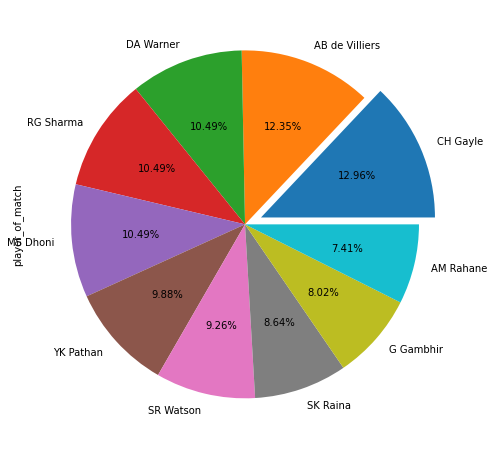

In [21]:
plt.figure(figsize=(13,8))
explode=[0.1,0,0,0,0,0,0,0,0,0]
matches_df['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

# Number Of Matches In Each Venue:

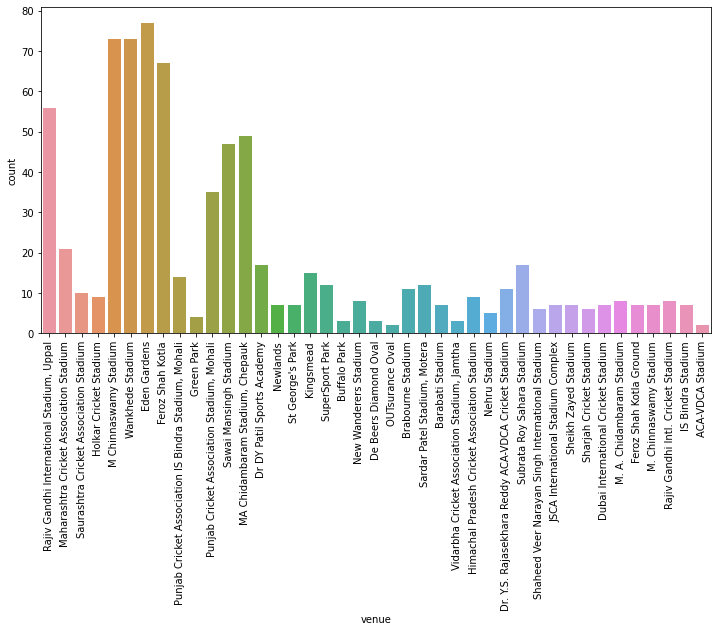

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

Number of matches played by each team

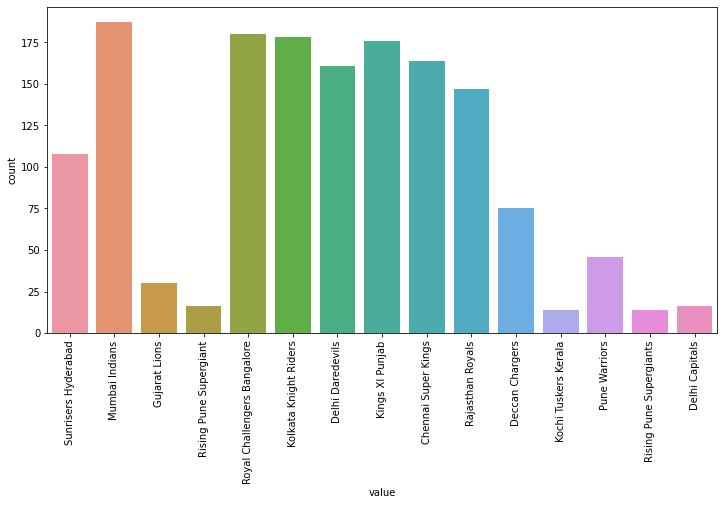

In [23]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

Number of wins per team

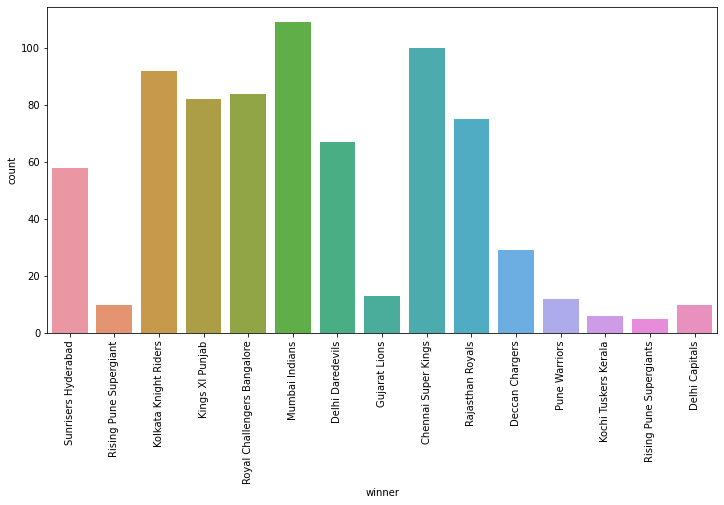

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches_df)
plt.xticks(rotation=90)
plt.show()

Champians Of Each Season

In [25]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


Toss Decision:

Let Us See Toss Decisions taken So Far

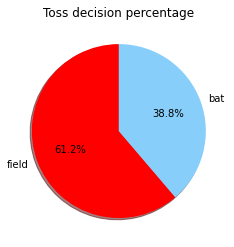

In [26]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

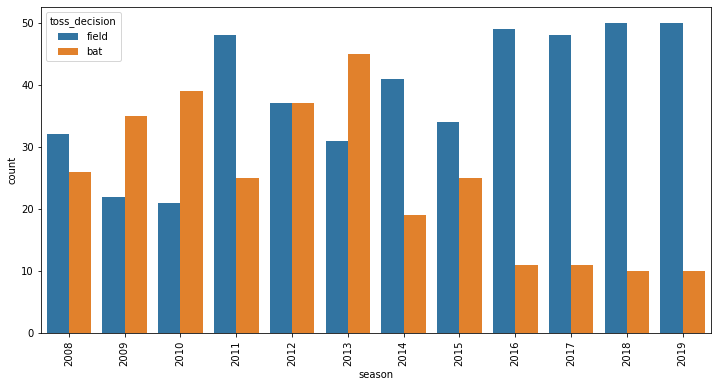

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

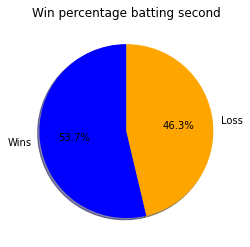

In [28]:
num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

Top Player Of Matches:

In [29]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

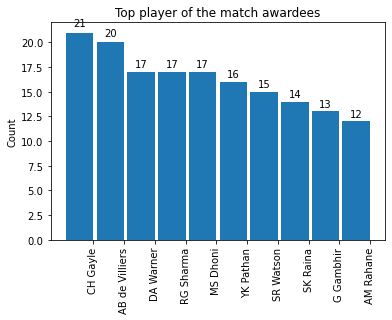

In [30]:
temp_series = matches_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

Top Umpires

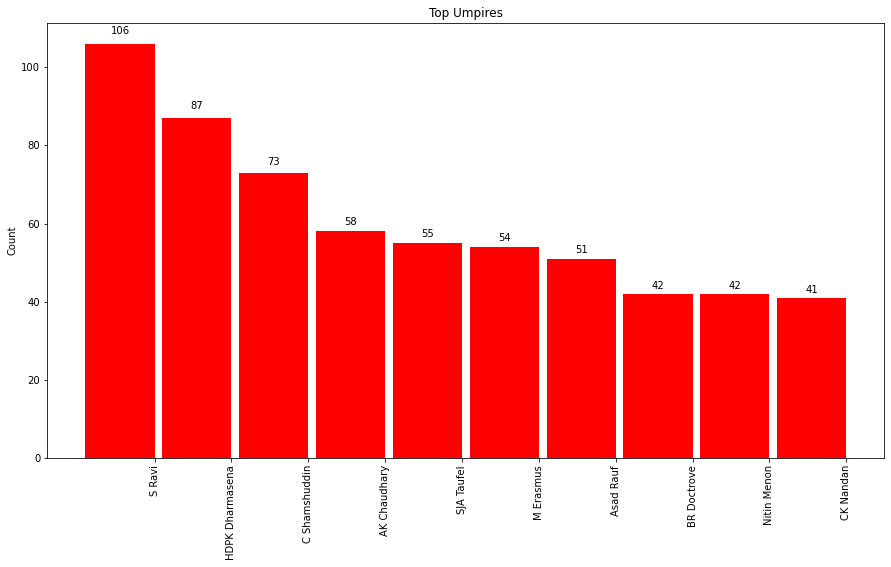

In [31]:
temp_df = pd.melt(matches_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

# Score Data Set

In [32]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Batsman Analysis

Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

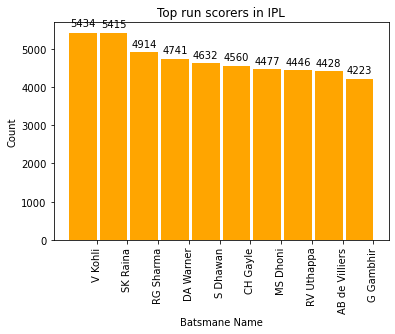

In [33]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

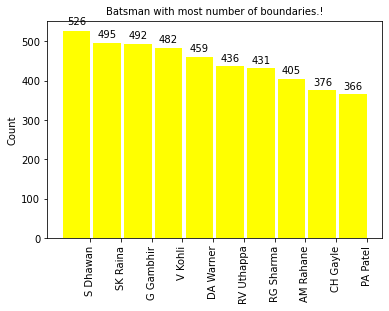

In [34]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

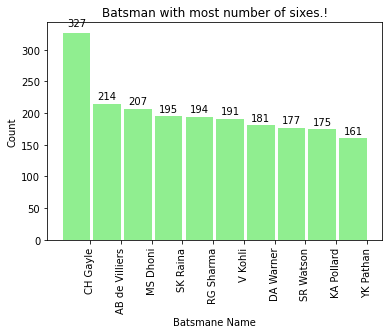

In [35]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

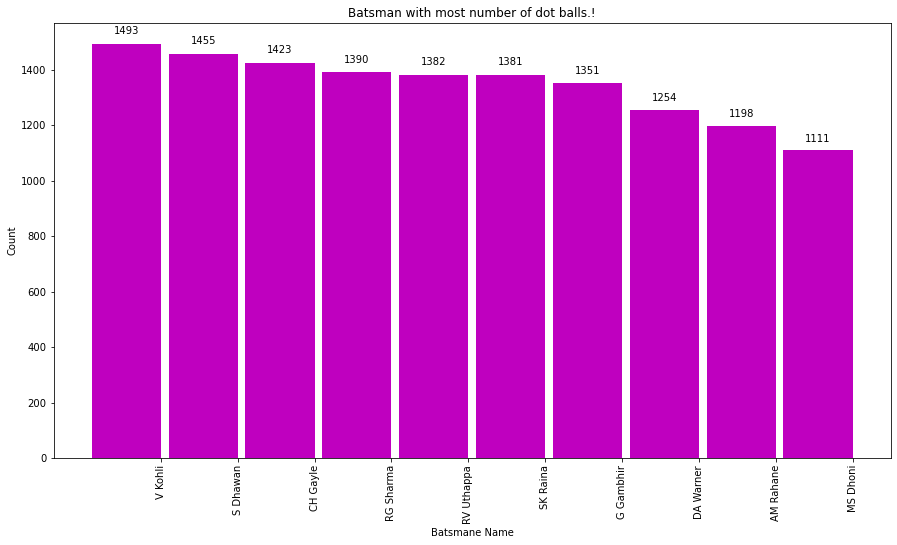

In [36]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

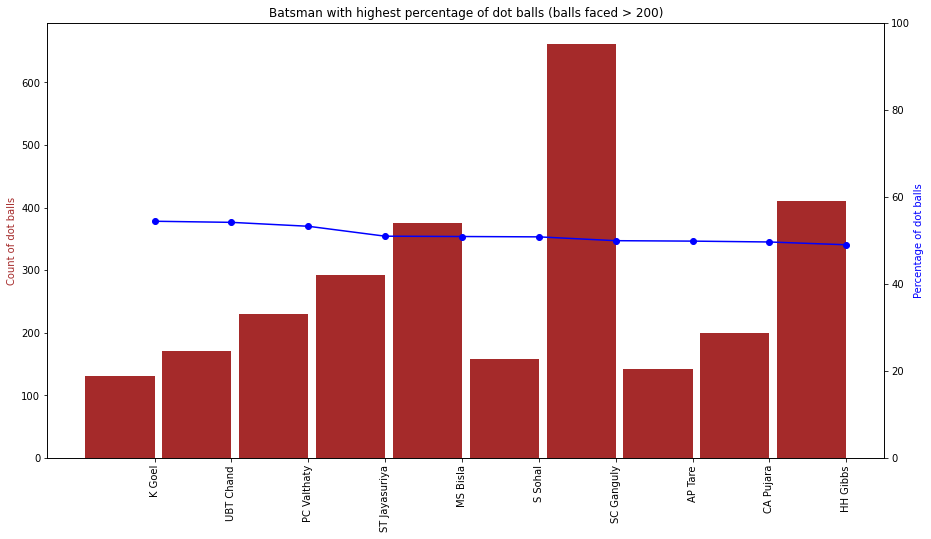

In [37]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

Bowler Analysis

Now let us see the bowlers who has bowled most number of balls in IPL.

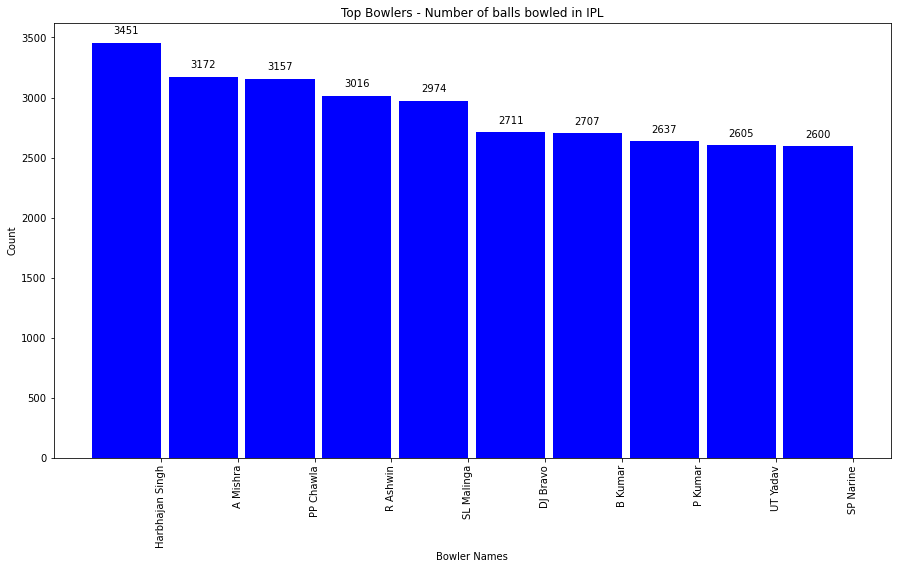

In [38]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

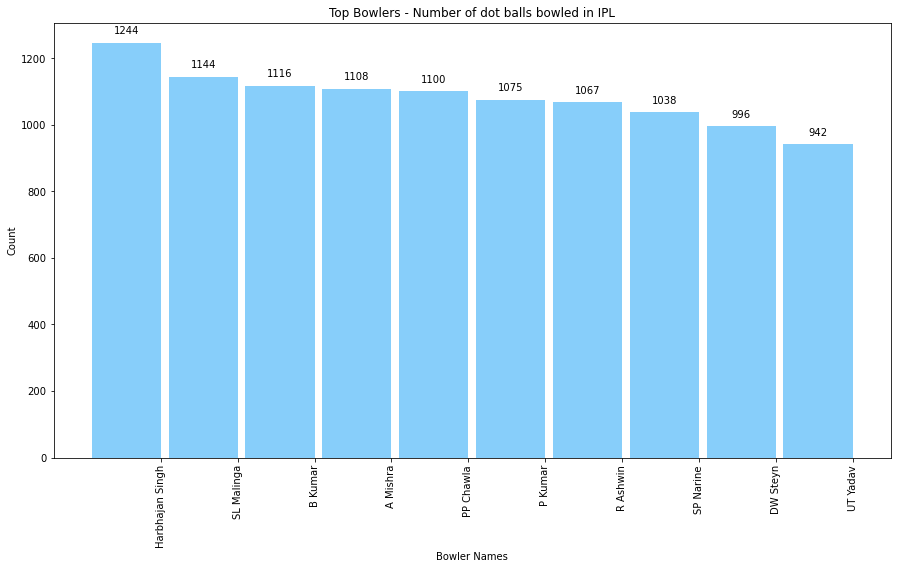

In [39]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

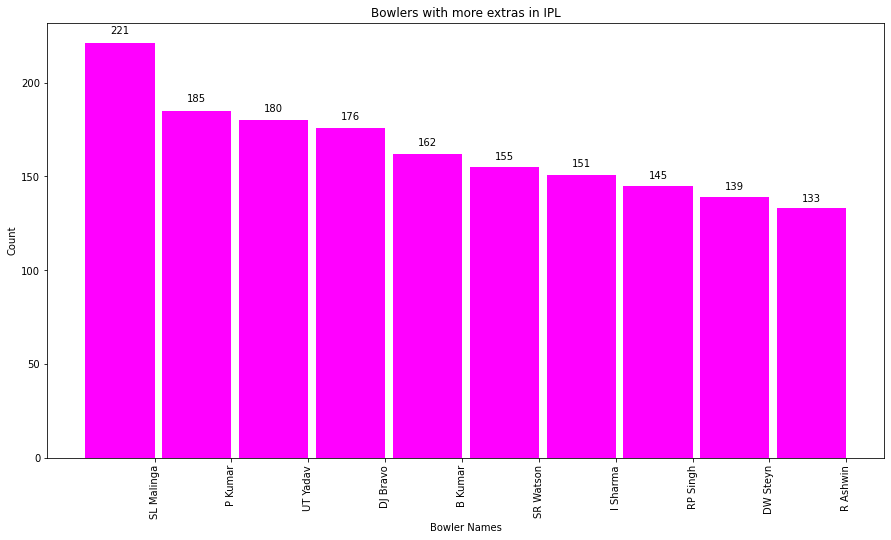

In [40]:
temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

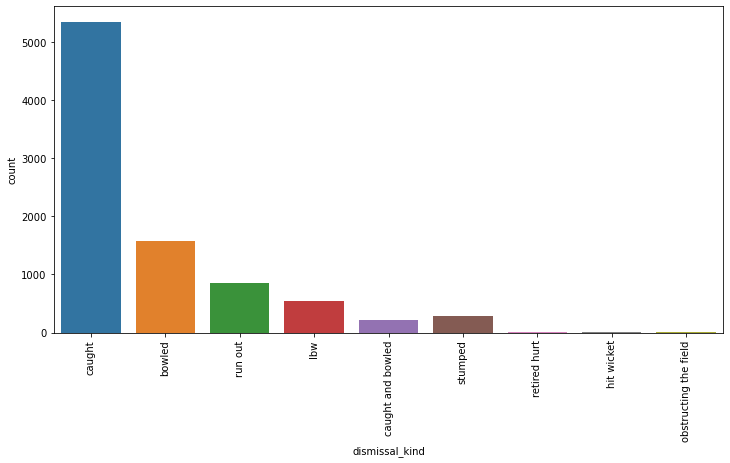

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()